# Ioannis Gkionis

## Logistic Regression Model

This was made as a part of a university project. The preprocessing is all done in functions.py and the logistic regression model is defined in regression.py. The code is all original and well-documented

In [1]:
from main import *
import matplotlib.pyplot as plt
import math
X_train.shape

(9071, 784)

The Logistic Regression model's source code can be found on regression.py with full documentation. The math used in these functions is almost identical to the math used in the labs, with some minor changes that were needed for the MNIST dataset. <br>
The Data Preprocessing is done using functions defined in functions.py, with the function load_and_prepare_data() wrapping all those up. All code is original and fully documented

Let's try running a Logistic Regression Model with the default parameters (no L2 regularization, 2000 iterations and a learning rate of 0.1)

In [2]:
run_Regression()

Model: Logistic Regression Classifier, Accuracy of test set:  0.981081081081081


Or alternatively:

In [3]:
J_train, J_valid, theta = ComputeLogisticRegression(X_train, y_train, X_valid, y_valid, _lambda=0.0, tot_iter=2000, alpha=0.1)

print_Predictions(theta, X_test, y_test, name='Logistic Regression Classifier', threshold=0.5 -1e-6)

Model: Logistic Regression Classifier, Accuracy of test set:  0.981081081081081


We can see that the classifier's accuracy is equal to 0.981. Note that this does not change because of the way we import the data (nothing is randomized). I was thinking about adding a random element for the 80-20 train-validation split but i ended up deciding against it in favour of having more consistent results

We can then show the Error value as a function of the number of iterations and use our model to predict the test data

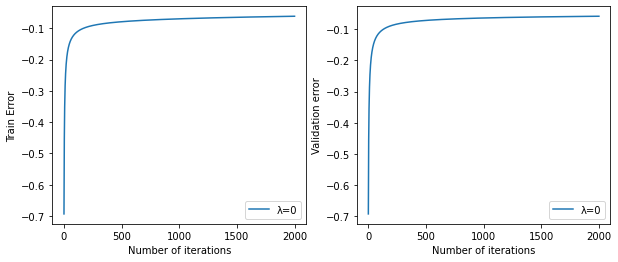

Accuracy of training set 0.9791643699702348
Accuracy of validation set 0.9783950617283951
Accuracy of test set 0.981081081081081


In [4]:
plt.figure( figsize=(10,4) )
plt.subplot( 1, 2, 1 )
plt.plot( np.arange( len(J_train) ), J_train, label='λ=0' )
plt.xlabel( 'Number of iterations' )
plt.ylabel( 'Train Error' )
plt.legend()
plt.subplot( 1,2,2)
plt.plot( np.arange( len(J_valid) ), J_valid, label='λ=0' )
plt.xlabel( 'Number of iterations' )
plt.ylabel( 'Validation error' )
plt.legend()
plt.show()
p_train, prob_train = predict( theta, X_train )
p_valid, prob_valid = predict( theta, X_valid )
p_test, prob_test = predict( theta, X_test )
print( 'Accuracy of training set', np.mean( p_train.astype('int') == y_train ) )
print( 'Accuracy of validation set', np.mean( p_valid.astype('int') == y_valid ) )
print( 'Accuracy of test set', np.mean( p_test.astype('int') == y_test ) )

We then get 20 possible lambda values ranging from 10^(-4) to 10 

In [5]:
values_no = 20
lambda_values = np.logspace(-4, 1, num=values_no, base=10).tolist()

In [6]:
final_loss = []
for i in range (0, len(lambda_values)-1):
    J_train, J_valid, theta = ComputeLogisticRegression( X_train, y_train, X_valid, y_valid, _lambda=lambda_values[i], tot_iter=2000, alpha=0.1 )
    final_loss.append(float(np.asarray(J_valid[-1])))

In [7]:
final_loss

[-0.057973986409076375,
 -0.05797428219304107,
 -0.0579748243573265,
 -0.057975818127229246,
 -0.057977639665530725,
 -0.05798097843362995,
 -0.05798709807423572,
 -0.05799831439430137,
 -0.05801887079316164,
 -0.05805654053694744,
 -0.05812555574773626,
 -0.058251949530651666,
 -0.058483258767518066,
 -0.058906011395479574,
 -0.05967679216526598,
 -0.06107594055781869,
 -0.06359552386878324,
 -0.06806809795137712,
 -0.0758083853347817]

We then see which model has the smallest cost (we use max(final_loss)) since we have the raw values and not absolute values in that list)

In [8]:
o = [index for index, item in enumerate(final_loss) if item == max(final_loss)]
     
lambda_values[o[0]]

0.0001

We then train a model with this lambda value and see how well it does in classifying the test data

In [9]:
J_train, J_valid, theta = ComputeLogisticRegression( X_train, y_train, X_valid, y_valid, _lambda=0.0001, tot_iter=2000, alpha=0.1 )
print_Predictions(theta, X_test, y_test, name='Logistic Regression Classifier', threshold=0.5 -1e-6)

Model: Logistic Regression Classifier, Accuracy of test set:  0.981081081081081
